<font color='blue'><h1 align = 'center' style= 'background :Yellow'>Mechanism of Action EDA</h1></font>

<font color='blue'><h2 align = 'center' style = 'background:LightGray'> Quick Navigation </h2></font>
#### [1. About the Competition](#2)
#### [2. What is MoA(Mechanism of Action)](#3)
#### [3. Dataset Overview](#4)
#### [4. Univariate and Multivariate Feature Visulaizations - To Understand the Data Better](#5)
#### [5. Understanding the Correlation](#5)
#### [6. Exploring "Scored Targets" Data](#6)
#### [7. Exploring "Non-Scored Targets" Data](#7)
#### [8. References](#8)

<font color = "red"><h3> If you find this notebook useful, Please upvote as it will act as a motivation for me for my next kernels.</h3></font>

<font color='blue'>

<h2 align = 'center' style= 'background :Yellow'> 1. About the Competiton:</h2>
    
**The <a href="https://clue.io">Connectivity Map</a>., a project within the Broad Institute of MIT and Harvard, together with the <a href="https://lish.harvard.edu"><b>Laboratory for Innovation Science at Harvard (LISH)</b></a>, presents this challenge with the goal of advancing drug development through improvements to MoA prediction algorithms.**

**In this competition, you will have access to a unique dataset that combines gene expression and cell viability data. The data is based on a new technology that measures simultaneously (within the same samples) human cells’ responses to drugs in a pool of 100 different cell types (thus solving the problem of identifying ex-ante, 
which cell types are better suited for a given drug). In addition, you will have access to MoA annotations for more than 5,000 drugs in this dataset.**

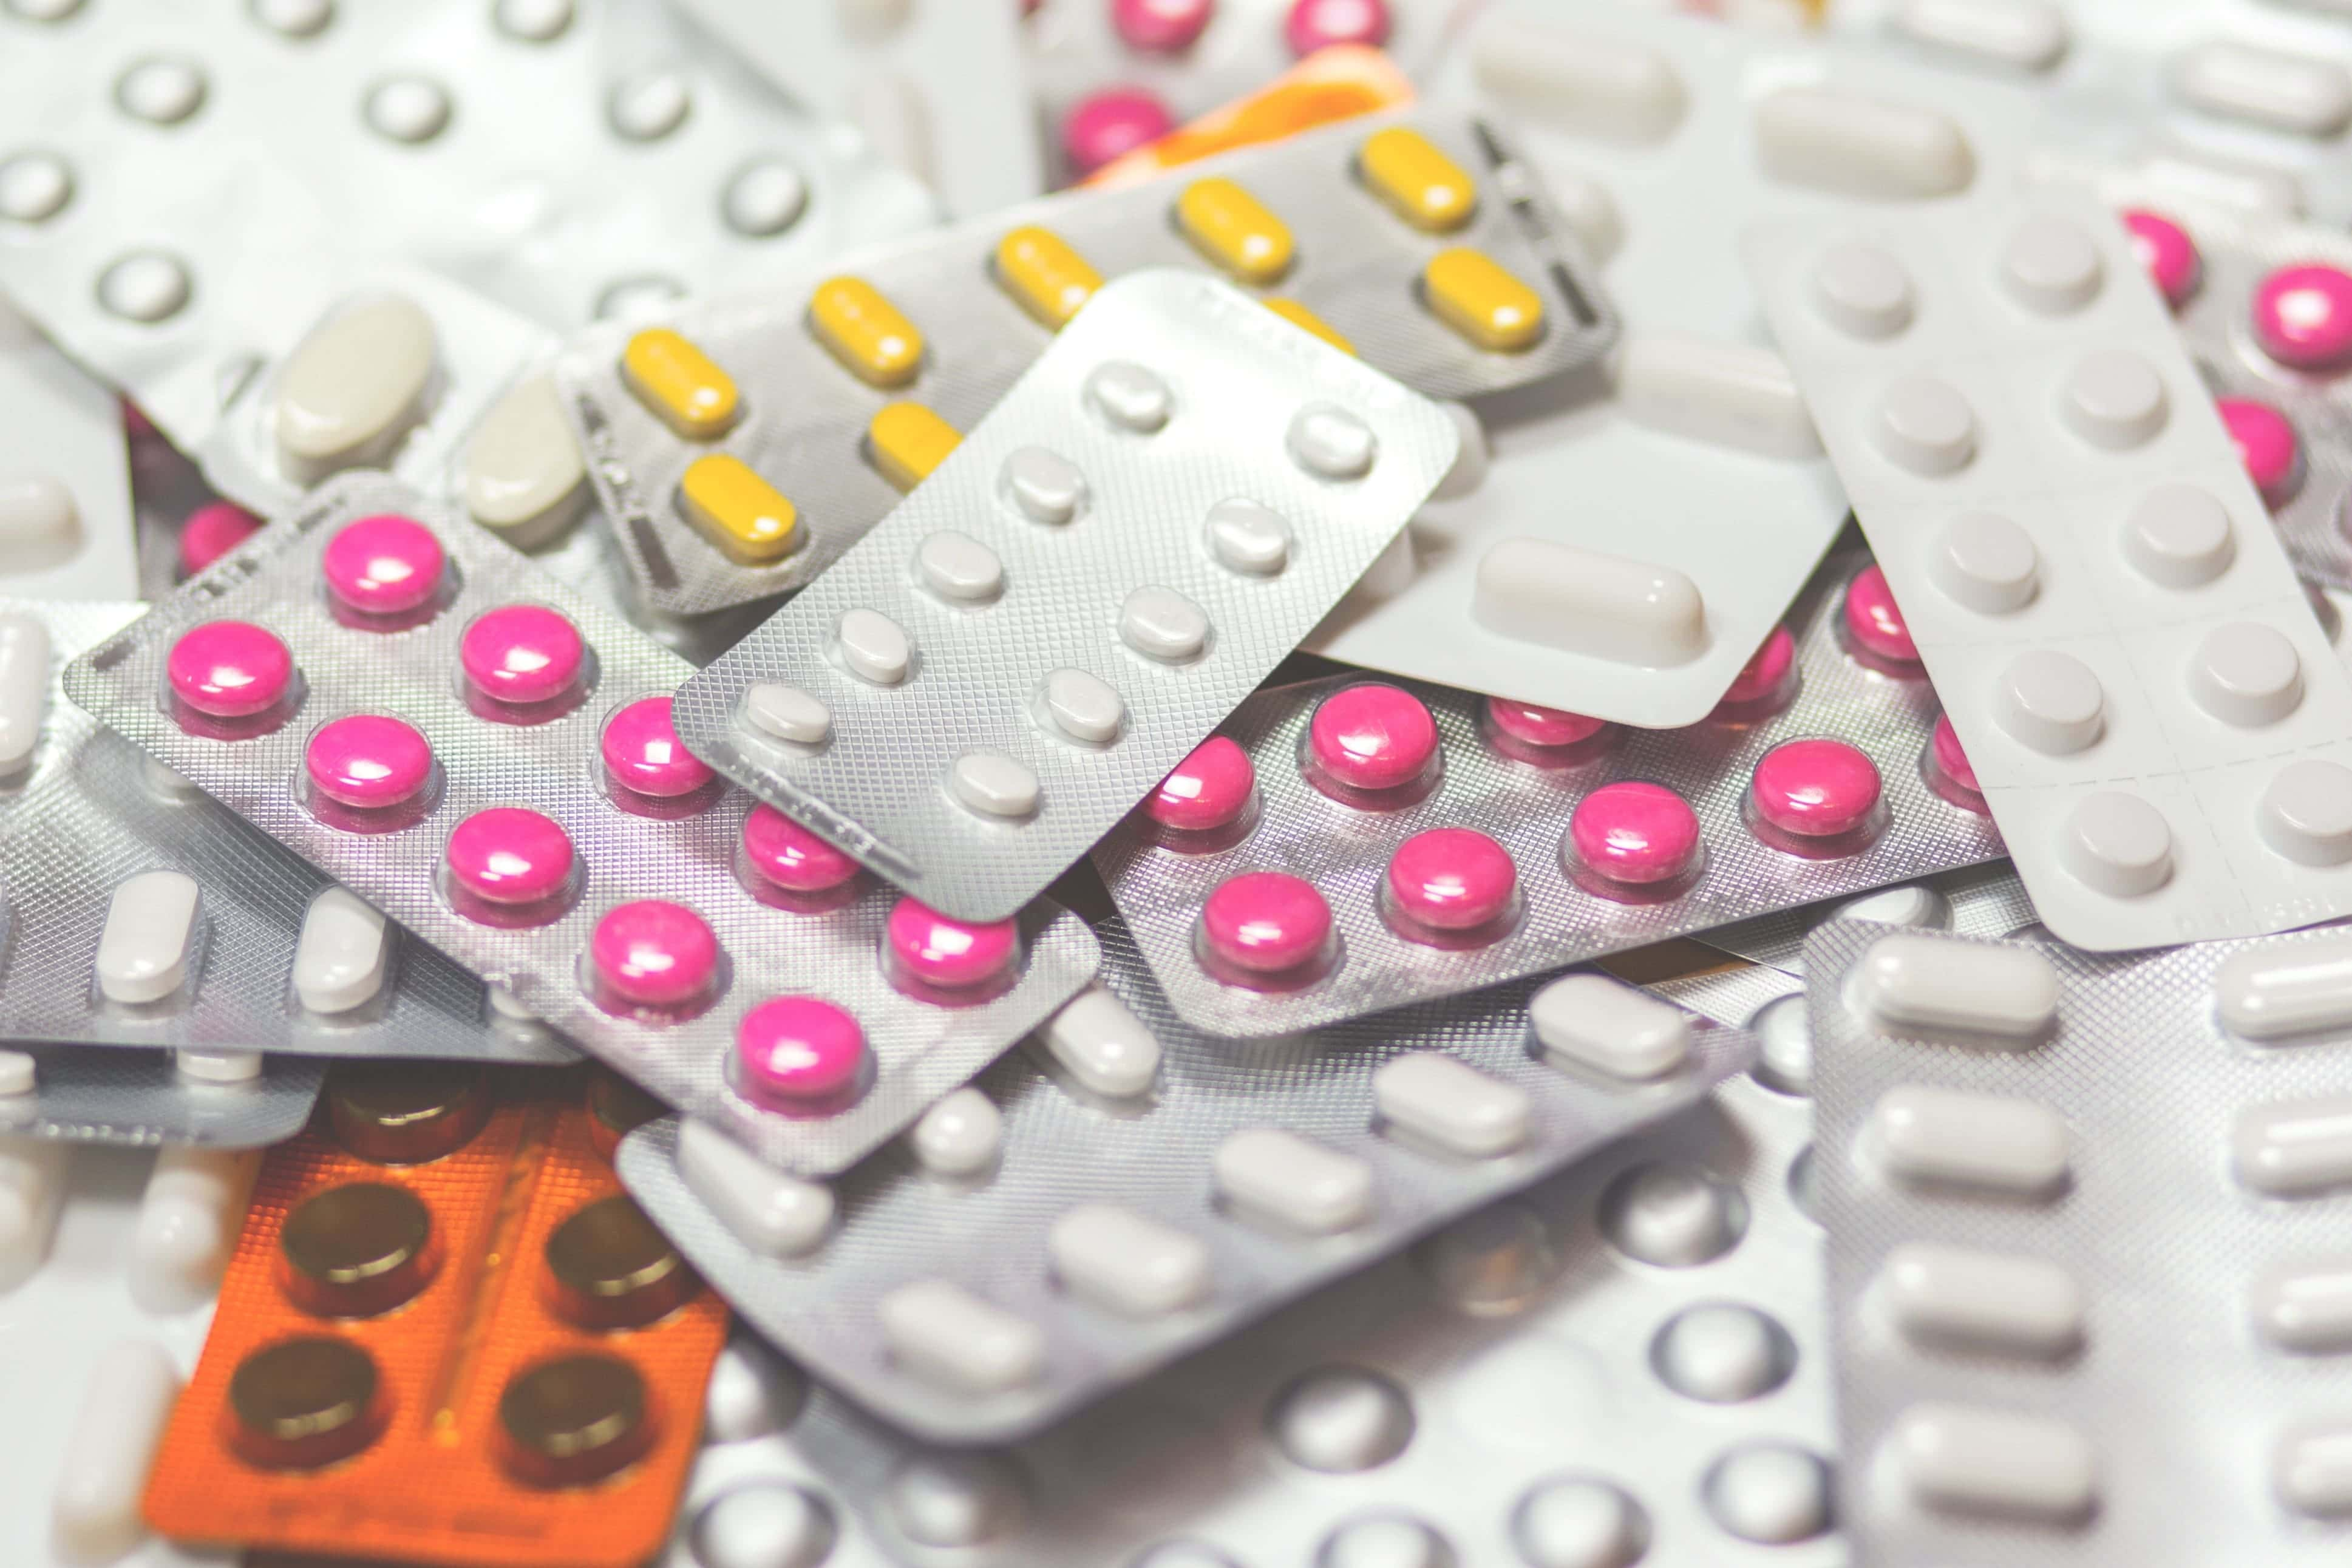

**As is customary, the dataset has been split into testing and training subsets. 
Hence, your task is to use the training dataset to develop an algorithm that automatically labels each case in the test set as one or more MoA classes.**

**Note: - Since drugs can have multiple MoA annotations, the task is formally a multi-label classification problem.**


<h2 align = 'center' style = 'background:Yellow'> 2. What is Mechanism of Action </h2>

**In pharmacology, the term mechanism of action (MOA) refers to the specific biochemical interaction through which a drug substance produces its pharmacological effect[2].A mechanism of action usually includes mention of the specific molecular targets to which the drug binds, such as an enzyme or receptor[3].Receptor sites have specific affinities for drugs based on the chemical structure of the drug, as well as the specific action that occurs there.**

**Drugs bind to receptors that are located on the surface of cells or within the cytoplasm (a jelly-like substance inside a cell). After the receptors bind to a cell, the drug will take on one of two roles: agonist or antagonist.**

**Drugs that do not bind to receptors produce their corresponding therapeutic effect by simply interacting with chemical or physical properties in the body. Common examples of drugs that work in this way are antacids and laxatives.[2]**

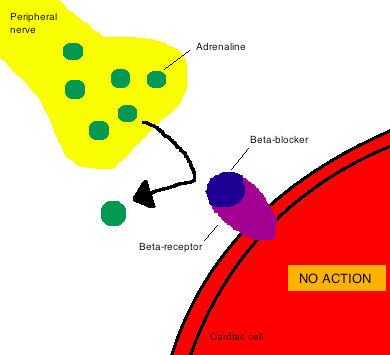
                                            Image Source: Wikipedia

<h3> How mechanism of action is determined </h3>

1. Computation inference methods
2. Microscopy-based methods
3. Direct biochemical methods
4. Omics based methods

**Our major part comes under 1st method where we can help in detreming the process through <b>Computation inference methods</b> from this Competition.**

<h2 align = 'center' style = 'background:Yellow'> 3. Data-set Overview  </h2>

In [ ]:
## Loading the Libraries
import warnings
warnings.filterwarnings("ignore")

#!pip3 install ipywidgets
#!jupyter nbextension enable --py --sys-prefix widgetsnbextension
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 500)
import ipywidgets as widgets
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline

<h3 align = 'center' style = 'background:Yellow'>  Loading the Datasets  </h3>

In [ ]:
## Loading the Dataset
train_data = pd.read_csv("/kaggle/input/lish-moa/train_features.csv")
train_target_scored_data = pd.read_csv("/kaggle/input/lish-moa/train_targets_scored.csv")
train_targets_non_scored_data = pd.read_csv("/kaggle/input/lish-moa/train_targets_nonscored.csv")
test_data = pd.read_csv("/kaggle/input/lish-moa/test_features.csv")

**About the MoA Dataset**
* **train_features.csv**- Features for the training set. Features g- signify gene expression data, and c- signify cell viability data. cp_type indicates samples treated with a compound (cp_vehicle) or with a control perturbation (ctrl_vehicle); control perturbations have no MoAs; cp_time and cp_dose indicate treatment duration (24, 48, 72 hours) and dose (high or low).

* **train_targets_scored.csv** - The binary MoA targets that are scored.

* **train_targets_nonscored.csv** - Additional (optional) binary MoA responses for the training data. These are not predicted nor scored.

* **test_features.csv** - Features for the test data. You must predict the probability of each scored MoA for each row in the test data.

In [ ]:
## Creating the widgets for the dataset
out1 = widgets.Output()
out2 = widgets.Output()
out3 = widgets.Output()
out4 = widgets.Output()

with out1:
    display(train_data.head(10))
with out2:
    display(train_target_scored_data.head(10))
with out3:
    display(train_targets_non_scored_data.head(10))
with out4:
    display(test_data.head(10))

tab = widgets.Tab(children = [out1, out2,out3,out4])
tab.set_title(0, 'Train data')
tab.set_title(1, 'Train Targets scored data')
tab.set_title(2, 'Train Targets non-scored data')
tab.set_title(3, 'Test data')
display(tab)

<h3 align = 'center' style = 'background:Yellow'> Data Summary </h3>

In [ ]:
## Creating the widgets for the dataset
summary1 = widgets.Output()
summary2 = widgets.Output()
with summary1:
    print("Unique IDs: ",train_data.sig_id.nunique())
    print("Total Rows inthe train Dataset:",train_data.shape[0])
    print("Total Columns in the Dataset :",train_data.shape[1])
    print("\nFrequency of values in 'cp_type' are:\n",train_data.cp_type.value_counts())
    print("\nFrequency of values in 'cp_dose' are:\n",train_data.cp_dose.value_counts())
    print("\nFrequency of values in 'cp_time' are:\n",train_data.cp_time.value_counts())


with summary2:
    print("Unique IDs: ",test_data.sig_id.nunique())
    print("Total Rows inthe train Dataset:",test_data.shape[0])
    print("Total Columns in the Dataset :",test_data.shape[1])
    print("\nFrequency of values in 'cp_type' are:\n",test_data.cp_type.value_counts())
    print("\nFrequency of values in 'cp_dose' are:\n",test_data.cp_dose.value_counts())
    print("\nFrequency of values in 'cp_time' are:\n",test_data.cp_time.value_counts())

tab = widgets.Tab(children = [summary1, summary2])
tab.set_title(0, 'Train data')
tab.set_title(1, 'Test data')
display(tab)

In [ ]:
train_data['data'] = 'Train data'
test_data['data'] = 'Test data'
full_data = pd.concat([train_data,test_data])

<h2 align = 'center' style = 'background:Yellow'> 4. Univariate and Multivariate Visulizations </h2>

<h3 align = 'center'><b>    Analysing the Train Dataset Features  </b></h2>

In [ ]:
cp_type_data = train_data.groupby(['cp_type'])['sig_id'].count().reset_index()
cp_type_data.columns = ['cp_type','count']

cp_time_data = train_data.groupby(['cp_time'])['sig_id'].count().reset_index()
cp_time_data.columns = ['cp_time','count']

cp_dose_data = train_data.groupby(['cp_dose'])['sig_id'].count().reset_index()
cp_dose_data.columns = ['cp_dose','count']

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Treatment", "Treatment time", "Treatment dose"))

fig.add_trace(go.Bar(x = cp_type_data['cp_type'], y = cp_type_data['count'],
                     text=cp_type_data['count'],
                     textposition="outside",
                     name = 'cp_type'),
                     row = 1, col = 1)

fig.add_trace(go.Bar(x = cp_time_data['cp_time'], y = cp_time_data['cp_time'],
                     text=cp_time_data['count'],
                     textposition="outside",
                     name = 'cp_time'),
                     row = 1, col = 2)

fig.add_trace(go.Bar(x = cp_dose_data['cp_dose'], y = cp_dose_data['count'],
                    text = cp_dose_data['count'],
                    textposition = 'outside',
                    name = 'cp_dose'),
                    row = 1, col = 3)

# Update xaxis properties
fig.update_xaxes(title_text="cp_type(Compound vs Control)", row=1, col=1)
fig.update_xaxes(title_text="cp_time(in Hrs)", row=1, col=2)
fig.update_xaxes(title_text="cp_dose(High vs Low)", row=1, col=3)
# Update yaxis properties
fig.update_yaxes(title_text="Total Observations in the Dataset", row=1, col=1)
fig.layout.template = 'plotly_dark'
fig.update_layout(title_text = "Train dataset Features")
fig.show()

<h3 align = 'center' style = 'background:Yellow'>Randomly selected Gene expression features in Train Dataset </h3>

In [ ]:
fig = make_subplots(
    rows=5, cols=2,
    subplot_titles=("Gene-0", "Gene-1", "Gene-2","Gene-3","Gene-55",
                   "Gene-56", "Gene-57", "Gene-58","Gene-88","Gene-90"))

fig.add_trace(go.Histogram(x=train_data["g-0"],name = 'g-0'),row = 1, col = 1)

fig.add_trace(go.Histogram(x=train_data["g-1"],name = 'g-1'),row = 1, col = 2)

fig.add_trace(go.Histogram(x=train_data["g-2"],name = 'g-2'),row = 2, col = 1)

fig.add_trace(go.Histogram(x=train_data["g-3"],name = 'g-3'),row = 2, col = 2)

fig.add_trace(go.Histogram(x=train_data["g-55"],name = 'g-55'),row = 3, col = 1)

fig.add_trace(go.Histogram(x=train_data["g-56"],name = 'g-56'),row = 3, col = 2)

fig.add_trace(go.Histogram(x=train_data["g-57"],name = 'g-57'),row = 4, col = 1)

fig.add_trace(go.Histogram(x=train_data["g-58"],name = 'g-58'),row = 4, col = 2)

fig.add_trace(go.Histogram(x=train_data["g-88"],name = 'g-88'),row = 5, col = 1)

fig.add_trace(go.Histogram(x=train_data["g-90"],name = 'g-90'),row = 5, col = 2)
fig.layout.template = 'plotly_dark'
fig.update_layout(showlegend=False,title_text = "Randomly selected Gene features distribution")
fig.show()

<h3 align = 'center'><b> Randomly Analysing G-55 and G-98 in Train Dataset Features </b></h3>

In [ ]:
fig1 = make_subplots(
    rows=1, cols=2,
    subplot_titles=("gene-55 expression", "gene-89 expression"))



cp_types = ['trt_cp', 'ctl_vehicle']

for cp_type in cp_types:
    fig1.add_trace(go.Violin(x=train_data['cp_type'][train_data['cp_type'] == cp_type],
                            y=train_data['g-55'][train_data['cp_type'] == cp_type],
                            name=cp_type,
                            line_color = 'blue',
                            box_visible=True,
                            meanline_visible=True),
                            row = 1, col = 1)
    fig1.add_trace(go.Violin(x=train_data['cp_type'][train_data['cp_type'] == cp_type],
                            y=train_data['g-89'][train_data['cp_type'] == cp_type],
                            name=cp_type,
                            line_color = 'orange',
                            box_visible=True,
                            meanline_visible=True),
                            row = 1, col = 2)

fig1.update_xaxes(title_text="cp_type", row=1, col=1)
fig1.update_xaxes(title_text="cp_type", row=1, col=2)
fig1.layout.template = 'plotly_dark'
fig1.update_layout(showlegend=False,title_text = "How gene-55 and gene-89 behaves differently on cp_types")
fig1.show()

In [ ]:
fig1 = make_subplots(
    rows=1, cols=2,
    subplot_titles=("gene-55 expression", "gene-89 expression"))



cp_duration = [24,48,72]

for cp_time in cp_duration:
    fig1.add_trace(go.Violin(x=train_data['cp_time'][train_data['cp_time'] == cp_time],
                            y=train_data['g-55'][train_data['cp_time'] == cp_time],
                            name=cp_time,
                            box_visible=True,
                            meanline_visible=True),
                            row = 1, col = 1)
    fig1.add_trace(go.Violin(x=train_data['cp_time'][train_data['cp_time'] == cp_time],
                            y=train_data['g-89'][train_data['cp_time'] == cp_time],
                            name=cp_time,
                            box_visible=True,
                            meanline_visible=True),
                            row = 1, col = 2)

fig1.update_xaxes(title_text="cp_time", row=1, col=1)
fig1.update_xaxes(title_text="cp_time", row=1, col=2)
fig1.layout.template = 'plotly_dark'
fig1.update_layout(showlegend=False,title_text = "How gene-55 and gene-89 behaves differently on cp_time")
fig1.show()

In [ ]:
fig1 = make_subplots(
    rows=1, cols=2,
    subplot_titles=("gene-55 exp.", "gene-89 exp"))



cp_doses = ['D1', 'D2']

for cp_dose in cp_doses:
    fig1.add_trace(go.Violin(x=train_data['cp_dose'][train_data['cp_dose'] == cp_dose],
                            y=train_data['g-55'][train_data['cp_dose'] == cp_dose],
                            name=cp_dose,
                            line_color = 'blue',
                            box_visible=True,
                            meanline_visible=True),
                            row = 1, col = 1)
    fig1.add_trace(go.Violin(x=train_data['cp_dose'][train_data['cp_dose'] == cp_dose],
                            y=train_data['g-89'][train_data['cp_dose'] == cp_dose],
                            name=cp_dose,
                            line_color = 'orange',
                            box_visible=True,
                            meanline_visible=True),
                           row = 1, col = 2)
    
fig1.update_xaxes(title_text="cp_dose", row=1, col=1)
fig1.update_xaxes(title_text="cp_dose", row=1, col=2)
fig1.layout.template = 'plotly_dark'
fig1.update_layout(showlegend=False,title_text = "How gene-55 and gene-89 behaves differently on cp_types")
fig1.update_layout(showlegend=False)
fig1.show()

<h3 align = 'center' style = 'background:Yellow'> Randomly selected Cell expression features in Train Dataset </h3>

In [ ]:
fig = make_subplots(
    rows=5, cols=2,
    subplot_titles=("Cell-0", "Cell-1", "Cell-2","Cell-3","Cell-55",
                   "Cell-56", "Cell-57", "Cell-58","Cell-88","Cell-90"))

fig.add_trace(go.Histogram(x=train_data["c-0"],name = 'c-0'),row = 1, col = 1)

fig.add_trace(go.Histogram(x=train_data["c-1"],name = 'c-1'),row = 1, col = 2)

fig.add_trace(go.Histogram(x=train_data["c-2"],name = 'c-2'),row = 2, col = 1)

fig.add_trace(go.Histogram(x=train_data["c-3"],name = 'c-3'),row = 2, col = 2)

fig.add_trace(go.Histogram(x=train_data["c-55"],name = 'c-55'),row = 3, col = 1)

fig.add_trace(go.Histogram(x=train_data["c-56"],name = 'c-56'),row = 3, col = 2)

fig.add_trace(go.Histogram(x=train_data["c-57"],name = 'c-57'),row = 4, col = 1)

fig.add_trace(go.Histogram(x=train_data["c-58"],name = 'c-58'),row = 4, col = 2)

fig.add_trace(go.Histogram(x=train_data["c-88"],name = 'c-88'),row = 5, col = 1)

fig.add_trace(go.Histogram(x=train_data["c-90"],name = 'c-90'),row = 5, col = 2)
fig.layout.template = 'plotly_dark'
fig.update_layout(showlegend=False,title_text = "Randomly selected cell-viability distribution")
fig.show()

<h3 align = 'center'><b> Randomly Analysing C-55 and C-98 in Train Dataset Features</b> </h3>

In [ ]:
fig1 = make_subplots(
    rows=1, cols=2,
    subplot_titles=("cell-55 expression", "cell-89 expression"))



cp_types = ['trt_cp', 'ctl_vehicle']

for cp_type in cp_types:
    fig1.add_trace(go.Violin(x=train_data['cp_type'][train_data['cp_type'] == cp_type],
                            y=train_data['c-55'][train_data['cp_type'] == cp_type],
                            name=cp_type,
                            line_color = 'blue',
                            box_visible=True,
                            meanline_visible=True),
                            row = 1, col = 1)
    fig1.add_trace(go.Violin(x=train_data['cp_type'][train_data['cp_type'] == cp_type],
                            y=train_data['c-89'][train_data['cp_type'] == cp_type],
                            name=cp_type,
                            line_color = 'orange',
                            box_visible=True,
                            meanline_visible=True),
                            row = 1, col = 2)
    
fig1.update_xaxes(title_text="cp_type", row=1, col=1)
fig1.update_xaxes(title_text="cp_type", row=1, col=2)
fig1.layout.template = 'plotly_dark'
fig1.update_layout(showlegend=False,title_text = "How cell-55 and cell-89 behaves differently on cp_types")
fig1.update_layout(showlegend=False)
fig1.show()

In [ ]:
fig1 = make_subplots(
    rows=1, cols=2,
    subplot_titles=("cell-55 expression", "cell-89 expression"))



cp_duration = [24,48,72]

for cp_time in cp_duration:
    fig1.add_trace(go.Violin(x=train_data['cp_time'][train_data['cp_time'] == cp_time],
                            y=train_data['c-55'][train_data['cp_time'] == cp_time],
                            name=cp_time,
                            line_color = 'blue',
                            box_visible=True,
                            meanline_visible=True),
                            row = 1, col = 1)
    fig1.add_trace(go.Violin(x=train_data['cp_time'][train_data['cp_time'] == cp_time],
                            y=train_data['c-89'][train_data['cp_time'] == cp_time],
                            name=cp_time,
                            line_color = 'orange',
                            box_visible=True,
                            meanline_visible=True),
                            row = 1, col = 2)

fig1.update_xaxes(title_text="cp_time", row=1, col=1)
fig1.update_xaxes(title_text="cp_time", row=1, col=2)
fig1.layout.template = 'plotly_dark'
fig1.update_layout(showlegend=False,title_text = "How cell-55 and cell-89 behaves differently on cp_time")
fig1.update_layout(showlegend=False)
fig1.show()

In [ ]:
fig1 = make_subplots(
    rows=1, cols=2,
    subplot_titles=("cell-55 expression", "cell-89 expression"))



cp_doses = ['D1','D2']

for cp_dose in cp_doses:
    fig1.add_trace(go.Violin(x=train_data['cp_dose'][train_data['cp_dose'] == cp_dose],
                            y=train_data['c-55'][train_data['cp_dose'] == cp_dose],
                            name=cp_dose,
                            line_color = 'blue',
                            box_visible=True,
                            meanline_visible=True),
                            row = 1, col = 1)
    fig1.add_trace(go.Violin(x=train_data['cp_dose'][train_data['cp_dose'] == cp_dose],
                            y=train_data['c-89'][train_data['cp_dose'] == cp_dose],
                            name=cp_dose,
                            line_color = 'orange',
                            box_visible=True,
                            meanline_visible=True),
                            row = 1, col = 2)

fig1.update_xaxes(title_text="cp_dose", row=1, col=1)
fig1.update_xaxes(title_text="cp_dose", row=1, col=2)
fig1.layout.template = 'plotly_dark'
fig1.update_layout(showlegend=False,title_text = "How cell-55 and cell-89 behaves differently on cp_dose")
fig1.update_layout(showlegend=False)
fig1.show()

<h3 align = 'center' style = 'background:Yellow'> Test Data Analysis </h3>

In [ ]:
cp_type_test_data = test_data.groupby(['cp_type'])['sig_id'].count().reset_index()
cp_type_test_data.columns = ['cp_type','count']

cp_time_test_data = test_data.groupby(['cp_time'])['sig_id'].count().reset_index()
cp_time_test_data.columns = ['cp_time','count']

cp_dose_test_data = test_data.groupby(['cp_dose'])['sig_id'].count().reset_index()
cp_dose_test_data.columns = ['cp_dose','count']


fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Treatment", "Treatment time", "Treatment dose"))

fig.add_trace(go.Bar(x = cp_type_test_data['cp_type'], y = cp_type_test_data['count'],
               text=cp_type_test_data['count'],
               textposition="outside",
                name = 'cp_dose'),
               row = 1, col = 1)

fig.add_trace(go.Bar(x = cp_time_test_data['cp_time'], y = cp_time_test_data['cp_time'],
              text=cp_time_test_data['count'],
              textposition="outside",
               name = "cp_time"),
              row = 1, col = 2)

fig.add_trace(go.Bar(x = cp_dose_test_data['cp_dose'], y = cp_dose_test_data['count'],
                    text = cp_dose_test_data['count'],
                    textposition = 'outside',
                    name = 'cp_dose'),
              row = 1, col = 3)

# Update xaxis properties
fig.update_xaxes(title_text="cp_type", row=1, col=1)
fig.update_xaxes(title_text="cp_time", row=1, col=2)
fig.update_xaxes(title_text="cp_dose", row=1, col=3)

# Update yaxis properties
fig.update_yaxes(title_text="Total Observations in the Dataset", row=1, col=1)
fig.layout.template = 'plotly_dark'
fig.update_layout(title_text ="Test dataset Features")

fig.show()

<h3 align = 'center'> ---------- Analyzing the Train and Test data distribution from the Sunburst chart ------ </h3>

In [ ]:
data = full_data.groupby(['cp_type','cp_time','cp_dose','data'])['sig_id'].count().reset_index()
data.columns = ['cp_type','cp_time','cp_dose','data', 'count']


fig = px.sunburst(data, path=['cp_type', 'cp_time', 'cp_dose'], values='count',
                  color_discrete_sequence = px.colors.qualitative.G10,
                 title ='Train and Test "cp_type","cp_dose" and "cp_dose" distribution')
fig.layout.template = 'plotly_dark'
fig.show()

<h3 align = 'center'>   Checking sample id wise is there any similarity between same inhibitor</h3>

In [ ]:
## Checking the type gene ditribution if a inhibitor gets activated
gene_data = train_data.set_index("sig_id")
gene_filter_col = [col for col in gene_data if col.startswith('g-')]
gene_filtered_data = gene_data[gene_filter_col]
gene_filtered_data.head()

## Cell viability data 
cell_data = train_data.set_index("sig_id")
cell_filter_col = [col for col in cell_data if col.startswith("c-")]
cell_filtered_data = cell_data[cell_filter_col]
cell_filtered_data.head()

In [ ]:
dna_inhibitor1 = gene_filtered_data.loc['id_039427e27'].to_frame()
dna_inhibitor2 = gene_filtered_data.loc['id_049604b47'].to_frame()

gsk_inhibitor1 = gene_filtered_data.loc['id_000644bb2'].to_frame()
gsk_inhibitor2 = gene_filtered_data.loc['id_001762a82'].to_frame()

dna_inhibitor_cell1 = cell_filtered_data.loc['id_039427e27'].to_frame()
dna_inhibitorcell2= cell_filtered_data.loc['id_049604b47'].to_frame()

gsk_inhibitor_cell1 = cell_filtered_data.loc['id_000644bb2'].to_frame()
gsk_inhibitor_cell2 = cell_filtered_data.loc['id_001762a82'].to_frame()



fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=("dna inhibitor gene exp.", "dna inhibitor gene exp.", "gsk inhibitor gene exp.","gsk inhibitor gene exp."
                    ,"dna inhibitor cell exp.","dna inhibitor cell exp.","gsk inhibitor cell exp.","gsk inhibitor cell exp."))

fig.add_trace(go.Histogram(x = dna_inhibitor1["id_039427e27"],name = 'dna inhibitor gene exp.'),row = 1, col = 1)

fig.add_trace(go.Histogram(x = dna_inhibitor2["id_049604b47"],name = 'dna inhibitor gene exp.'),row = 1, col = 2)

fig.add_trace(go.Histogram(x=gsk_inhibitor1["id_000644bb2"],name = 'gsk inhibitor gene exp.'),row = 2, col = 1)

fig.add_trace(go.Histogram(x=gsk_inhibitor2["id_001762a82"],name = 'gsk inhibitor gene exp.'),row = 2, col = 2)

#cell_filtered_data
fig.add_trace(go.Histogram(x = dna_inhibitor_cell1["id_039427e27"],name = 'dna inhibitor cell exp.'),row = 3, col = 1)

fig.add_trace(go.Histogram(x = dna_inhibitorcell2["id_049604b47"],name = 'dna inhibitor cell exp.'),row = 3, col = 2)

fig.add_trace(go.Histogram(x = gsk_inhibitor_cell1["id_000644bb2"],name = 'gsk inhibitor cell exp.'),row = 4, col = 1)

fig.add_trace(go.Histogram(x = gsk_inhibitor_cell2["id_001762a82"],name = 'gsk inhibitor cell exp.'),row = 4, col = 2)
fig.layout.template = 'plotly_dark'
fig.update_layout(showlegend=False,title_text = "Analysisng Randomly selected DNA Inhibitor and GSK Inhibitor")
fig.show()

<h2 align = 'center' style = 'background:Yellow'> 4. Undertanding the Correlation from the data </h2>

<h3>What is Gene Expression</h3>

Gene expression is the process by which information from a gene is used in the synthesis of a functional gene product. These products are often proteins, but in non-protein-coding genes such as transfer RNA (tRNA) or small nuclear RNA (snRNA) genes, the product is a functional RNA.

Regulation of gene expression gives control over the timing, location, and amount of a given gene product (protein or ncRNA) present in a cell and can have a profound effect on the cellular structure and function.

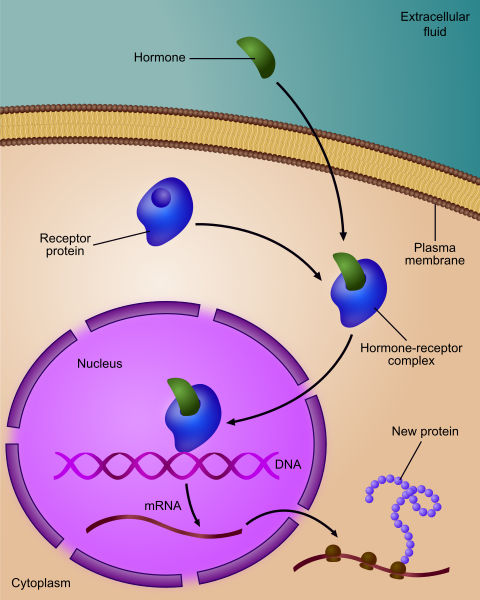

 
Regulation of gene expression, or gene regulation,[1] includes a wide range of mechanisms that are used by cells to increase or decrease the production of specific gene products (protein or RNA). Sophisticated programs of gene expression are widely observed in biology, for example to trigger developmental pathways, respond to environmental stimuli, or adapt to new food sources. Virtually any step of gene expression can be modulated, from transcriptional initiation, to RNA processing, and to the post-translational modification of a protein. Often, one gene regulator controls another, and so on, in a gene regulatory network.



<h3 align = 'center' style = 'background:Yellow'> Checking the correlations between the gene expression </h3>

In [ ]:
gene_filtered_data_25_exp = gene_filtered_data[gene_filtered_data.columns[0:25]]
#gene_filtered_data_20_exp.head()
f = plt.figure(figsize=(15, 15))
plt.matshow(gene_filtered_data_25_exp.corr(), fignum=f.number)
plt.xticks(range(gene_filtered_data_25_exp.shape[1]), gene_filtered_data_25_exp.columns, fontsize=14, rotation=45)
plt.yticks(range(gene_filtered_data_25_exp.shape[1]), gene_filtered_data_25_exp.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

#print("Top Absolute Correlations")
high_correlated_gene_exp = get_top_abs_correlations(gene_filtered_data, 10).to_frame()

<h3 align = 'center'> Highly Correlated Genes pair </h3>

In [ ]:
high_correlated_gene_exp.reset_index(inplace=True) 
high_correlated_gene_exp = high_correlated_gene_exp.rename(columns={'level_0': 'Correlated_col1', 'level_1': 'Correlated_col2',0:'Correlation_value'})
high_correlated_gene_exp.head(10).style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'lawngreen',                       
                                    'border-color': 'white'})

In [ ]:
fig = px.scatter(train_data, x = "g-37", y = "g-50",color = 'cp_type')
fig.update_layout(title ='Correlation of g-37 and g-50 with varying CP Type')
fig.layout.template = 'plotly_dark'
fig.show()

In [ ]:
fig = px.scatter(train_data, x = "g-37", y = "g-50",color = 'cp_time')
fig.update_layout(title ='Correlation of g-37 and g-50 with varying CP Time')
fig.layout.template = 'plotly_dark'
fig.show()

In [ ]:
fig = px.scatter(train_data, x = "g-37", y = "g-50",color = 'cp_dose')
fig.update_layout(title ='Correlation of g-37 and g-50 with varying CP Dose')
fig.layout.template = 'plotly_dark'
fig.show()

<h3 align = 'center' style = 'background:Yellow'> Correlation between cell expression </h3>

In [ ]:
cell_filtered_data_25_exp = cell_filtered_data[cell_filtered_data.columns[0:25]]
#gene_filtered_data_20_exp.head()
f = plt.figure(figsize=(15, 15))
plt.matshow(cell_filtered_data_25_exp.corr(), fignum=f.number)
plt.xticks(range(cell_filtered_data_25_exp.shape[1]), cell_filtered_data_25_exp.columns, fontsize=14, rotation=45)
plt.yticks(range(cell_filtered_data_25_exp.shape[1]), cell_filtered_data_25_exp.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16)

<h3 align = 'center'>  Highly Correlated Cell viability pair </h3>

In [ ]:
high_correlated_cell_exp = get_top_abs_correlations(cell_filtered_data, 10).to_frame()
high_correlated_cell_exp.reset_index(inplace=True) 
high_correlated_cell_exp = high_correlated_cell_exp.rename(columns={'level_0': 'Correlated_col1', 'level_1': 'Correlated_col2',0:'Correlation_value'})
high_correlated_cell_exp.head(10).style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'lawngreen',                       
                                    'border-color': 'white'})

<h3 align = 'center'>  Analysing the c-42 and c-52 correlation with other factor </h3>

In [ ]:
fig = px.scatter(train_data, x = "c-42", y = "c-52",color = 'cp_type')
fig.update_layout(title ='Correlation of c-42 and c-52 with varying CP Type')
fig.layout.template = 'plotly_dark'
fig.show()

In [ ]:
fig = px.scatter(train_data, x = "c-42", y = "c-52",color = 'cp_time')
fig.update_layout(title ='Correlation of c-42 and c-52 with varying CP Time')
fig.layout.template = 'plotly_dark'
fig.show()

In [ ]:
fig = px.scatter(train_data, x = "c-42", y = "c-52",color = 'cp_dose')
fig.update_layout(title ='Correlation of c-42 and c-52 with varying CP Dose')
fig.layout.template = 'plotly_dark'
fig.show()

<h2 align = 'center' style = 'background:Yellow'> 6. Analysing the Train Target scored data </h2>

<h3 align = 'center'>  Top 20 MoA Annotations </h3>

In [ ]:
train_target_scored_data = train_target_scored_data.drop(['sig_id'], axis=1).sum(axis=0).sort_values(ascending = False).reset_index()
train_target_scored_data.columns = ['MoA annotations', 'total_counts']
train_target_scored_data = train_target_scored_data.head(20)
fig = px.bar(train_target_scored_data.sort_values('total_counts',ascending = False)
            .sort_values('total_counts', ascending = True),
            x = "total_counts",y = "MoA annotations",
            color_discrete_sequence = px.colors.qualitative.Alphabet,
            title = "Top 20 MoA annotations",
            orientation = 'h')
fig.layout.template = 'plotly_dark'
fig.update_layout(title ='Top MoA Annotations',
                   yaxis_title ='Mechanism of Action Classes',
                   xaxis_title ='Counts')
fig.show()

<h2 align = 'center' style = 'background:Yellow'> 8. Analyzing the Non-Scored Data </h2>

In [ ]:
train_non_targets = train_targets_non_scored_data.drop(['sig_id'], axis=1).sum(axis=0).sort_values(ascending = False).reset_index()
train_non_targets.columns = ['MoA annotations', 'total_counts']
train_non_targets = train_non_targets.head(20)
fig = px.bar(train_non_targets.sort_values('total_counts',ascending = False)
            .sort_values('total_counts', ascending = True),
            x = "total_counts",y = "MoA annotations",
            color_discrete_sequence = px.colors.qualitative.Dark2,
            title = "Top 20 MoA annotations",
            orientation = 'h')
fig.layout.template = 'plotly_dark'
fig.update_layout(title ='Top MoA Annotations',
                   yaxis_title ='Mechanism of Action Classes',
                   xaxis_title ='Counts')
fig.show()

<h2 align = 'center' style = 'background:Yellow'> 9. References </h2>

##### [1. Spratto, G.R.; Woods, A.L. (2010). Delmar Nurse's Drug Handbook. Cengage Learning. ISBN 978-1-4390-5616-5](#1)
##### [2. Grant, R.L.; Combs, A.B.; Acosta, D. (2010) "Experimental Models for the Investigation of Toxicological Mechanisms". In McQueen, C.A. Comprehensive Toxicology (2nd ed.). Oxford: Elsevier. p. 204. ISBN 978-0-08-046884-6](#2)
#### [3. https://en.wikipedia.org/wiki/Mechanism_of_action#cite_note-3](#3)
#### [4. https://www.kaggle.com/headsortails/explorations-of-action-moa-eda/report](#4)
#### [5. https://www.kaggle.com/isaienkov/mechanisms-of-action-moa-prediction-eda](#5)
